# Управляемая самостоятельная работа 2. Основы ООП в python

Корзун Влад, 4 гр., 20.05.2024

## Задание 1

При описании методов класса чтобы получить доступ к самому экземпляру класса используется переменная self, которая ссылается на сам экземпляр класса

Соглашения относительно self:
- называем переменную self
- она всегда идёт первым аргументом в описании метода класса
- при вызове первый аргумент соответствует второму аргументу в описании, self создатся автоматически и передаётся первым аргументом тоже автоматически

cls подразумевает, что метод принадлежит классу, тогда как self подразумевает, что метод связан с экземпляром класса, поэтому доступ к члену с clsосуществляется по имени класса, тогда как доступ к методу с self осуществляется через экземпляр класса... это та же концепция как static memberи non-static membersв Java, если вы из Java.

## Задание 2

In [6]:
class Class1:
    ...

class Class2(object):
    ...

class Class3(Class2, Class1):
    ...

i1 = Class1()
i2 = Class2()
i3 = Class3()

Class1 и Class2 - наследуются от object, а Class3 - от Class2 и Class1. Все атрибуты и методы первых двух классов есть в третьем но не наоборот

In [11]:
isinstance(i1, (Class2, Class3))

False

In [12]:
isinstance(i3, (Class1, Class2))

True

In [17]:
Class1.__mro__, Class2.__mro__, Class3.__mro__

((__main__.Class1, object),
 (__main__.Class2, object),
 (__main__.Class3, __main__.Class2, __main__.Class1, object))

In [24]:
issubclass(Class1, Class3), issubclass(Class3, Class1)

(False, True)

## Задание 3

In [33]:
class Complex():

    def __init__(self, r = 0, i = 0):   # ф-ция для инициализации
        self.r, self.i = r, i
    
    def soprajenie(self):               # ф-ция заданная по условию
        return Complex(self.r, -self.i)
    
    def __eq__(self, value):            # ф-ция для проверки идентичности
        return (self.i == value.i and self.r == value.r)

c0 = Complex()                          # 0 + 0j
c1 = Complex(1,2)                       # 1 + 2j
c2 = c1.soprajenie()                    # вызов метода класса
c3 = Complex(1,2)
c1 == c2, c1 == c3                      # Проверка метода eq

(False, True)

## Задание 4

In [60]:
class Stack(list):
    def push(self, value):          # Создание метода вставки элемента
        self.append(value)
    
s = Stack()                         # Инициализация стека
for i in range(100):
    s.push(i)                       # Вызов метода
    

## Задание 5

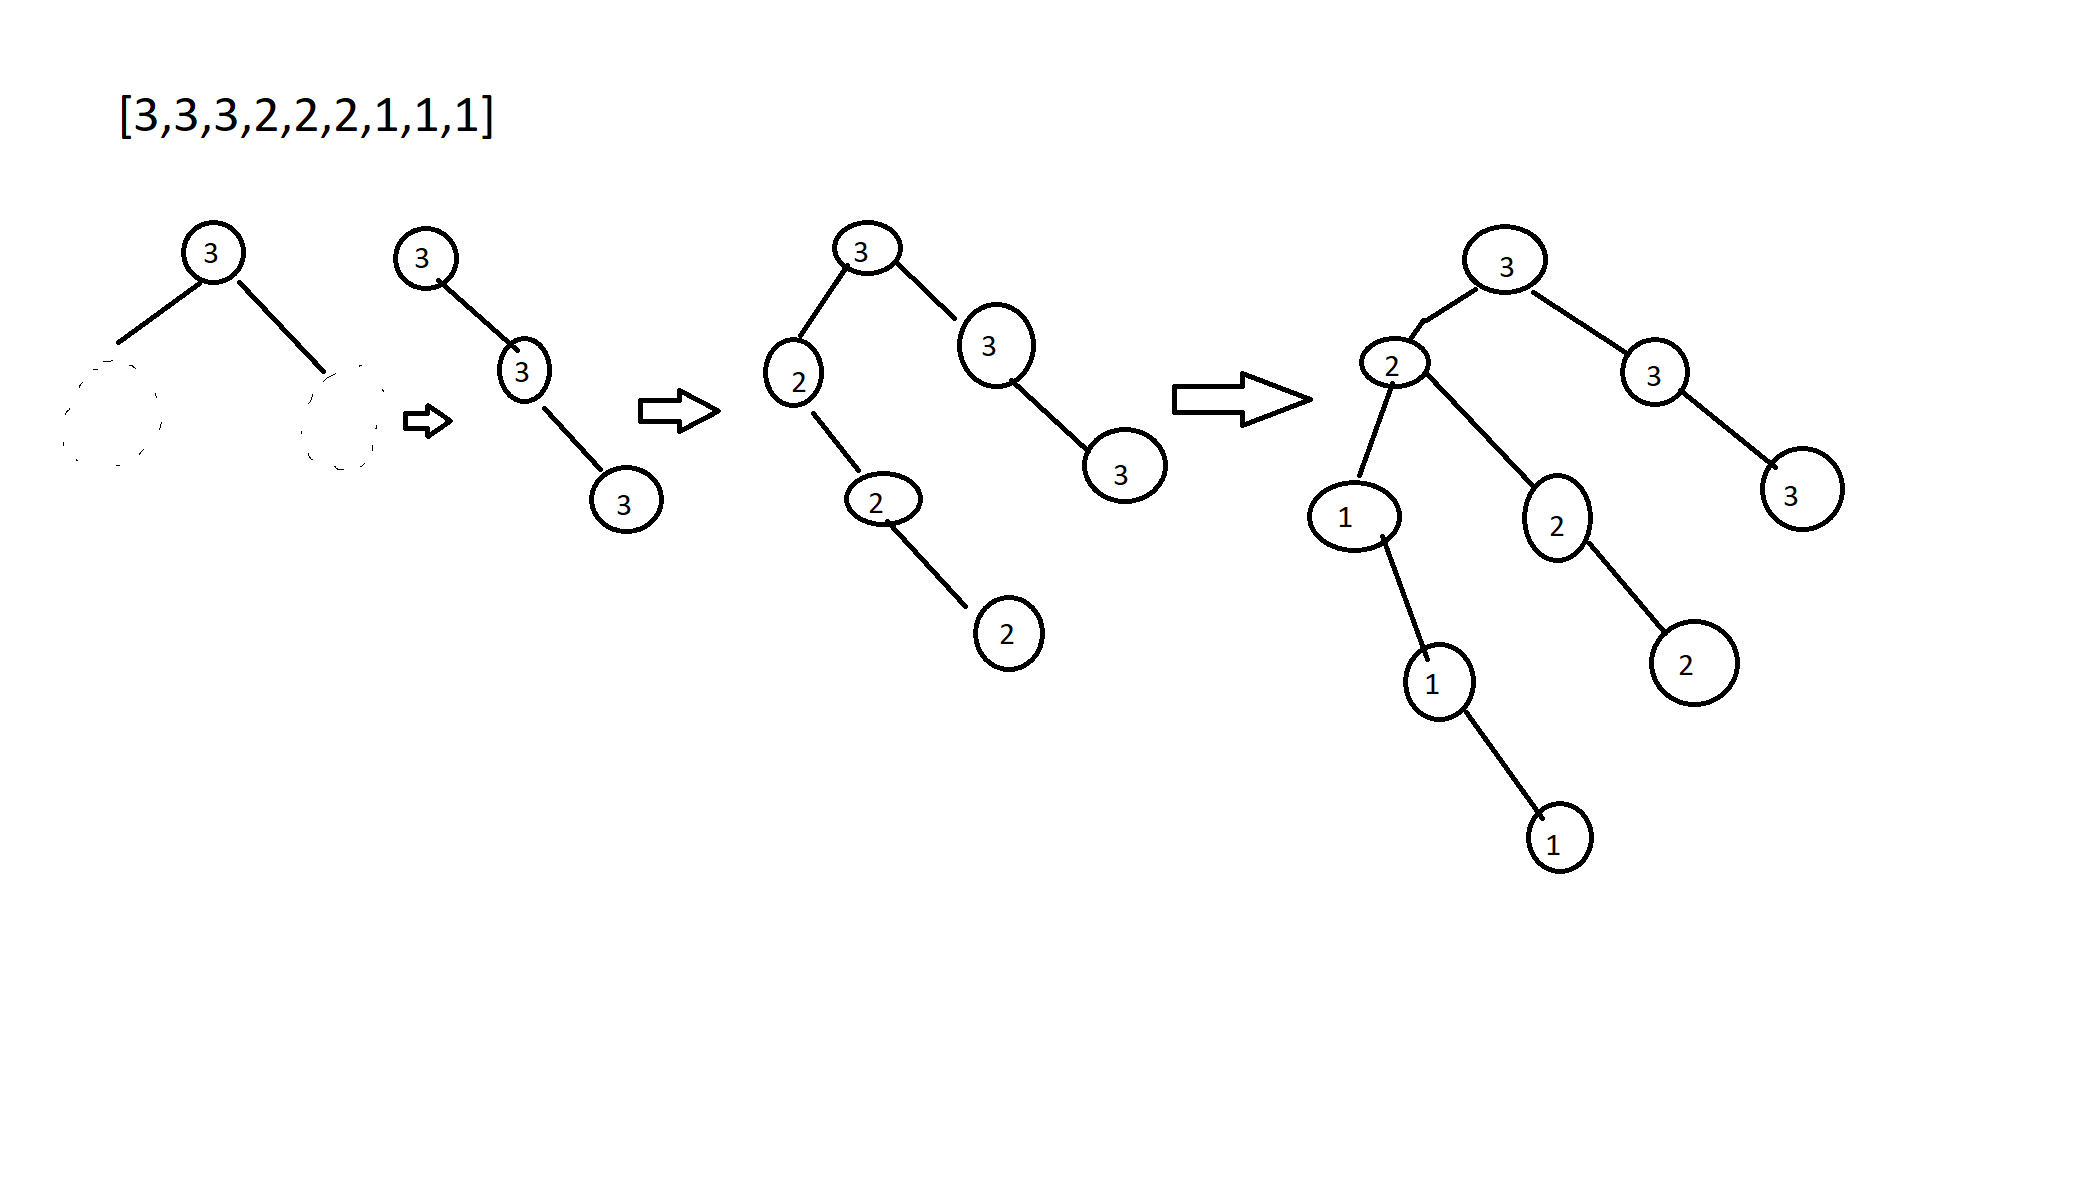

In [35]:
class BinaryTree:
    def __init__(self):
        self.root = EmptyNode()             # Создаём начальное положение, в начале у нас пустое дерево, потом мы заменим root
        ...
    
class BinaryNode:
    def __init__(self, value):
        self.value = value
        self.left = EmptyNode()             # BinaryNode содержит две ветви и значение
        self.right = EmptyNode()
        ...

class EmptyNode:
    def __init__(self):                     # В EmptyNode нет необходимых атрибутов, этот класс служит как заглушка для рекурсивных функций
        ...

Когда мы определяем методы классов insert, вызывать ручками можно только в BinaryTree, который сам вызывает рекурсивно insert из BinaryNode, а в EmptyNode стоит заглушка или остановка рекурсии, это пример использования связи между классами, в этих классах мы реализовывали и другие методы, такие как \_\_len\_\_ или \_\_contains\_\_. В этой реализации нет никакого наследования

В экземпляр класса BinaryTree можно добавить элементы типа bool, в частности False, т.к. он наследуется от класса int, т.е. False преобразуется в 0 и добавится как число, а None не пройдёт часть кода где сравниваются значения:

In [36]:
True > 0.4

True

In [37]:
None > 0.4      # Ошибка

TypeError: '>' not supported between instances of 'NoneType' and 'float'

In [59]:
class MyClass:
    x = 4                               # Создание атрибута класса

    def __init__(self, value = 4):
        self.x = value

    def __add__(self, value):           # Перегрузка оператора +
        return MyClass(self.x + value)
    
    @classmethod                        # Создание классового метода
    def change(cls, value):
        print('class method called')
        cls.x = value
        return cls.x
    
    @staticmethod                       # Создание статического метода
    def draw():
        print("Start drawing")

print(MyClass.x)                        # Доступ к атрибуту
c1 = MyClass()
print(c1.x)                             # Доступ к атрибуту
c1.draw()                               # Доступ к статическому методу
c1 = c1 + 5                             # Доступ к перегруженному методу
print(c1.x)
c2 = MyClass()
c2.change(5)                            # Доступ к классовому методу
print(c2.x, c1.x)

4
4
Start drawing
9
class method called
4 9
